In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks, preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
# Normalize the pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.1  # Use 10% of training data as validation data
)

# Fit the data generator to the training data
datagen.fit(train_images)

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),    # Flatten the input image
    layers.Dense(256, activation='relu'),       # Dense layer with 256 neurons
    layers.BatchNormalization(),               # Batch Normalization
    layers.Dropout(0.3),                       # Dropout for regularization
    layers.Dense(128, activation='relu'),       # Dense layer with 128 neurons
    layers.BatchNormalization(),               # Batch Normalization
    layers.Dropout(0.3),                       # Dropout for regularization
    layers.Dense(64, activation='relu'),       # Dense layer with 64 neurons
    layers.BatchNormalization(),               # Batch Normalization
    layers.Dropout(0.3),                       # Dropout for regularization
    layers.Dense(10, activation='softmax')      # Output layer with 10 classes (one for each class)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Callback list
callbacks_list = [early_stop]

In [ ]:
# Train the model with data augmentation and validation split
history = model.fit(datagen.flow(train_images, train_labels, subset='training'),
                    epochs=50,
                    validation_data=datagen.flow(train_images, train_labels, subset='validation'),
                    callbacks=callbacks_list)

Epoch 1/50
1407/1407 [==============================] - 66s 46ms/step - loss: 2.0666 - accuracy: 0.1038 - val_loss: 1.9334 - val_accuracy: 0.0436
Epoch 2/50
1407/1407 [==============================] - 58s 41ms/step - loss: 1.8812 - accuracy: 0.0998 - val_loss: 1.8481 - val_accuracy: 0.1138
Epoch 3/50
1407/1407 [==============================] - 59s 42ms/step - loss: 1.8569 - accuracy: 0.0982 - val_loss: 1.7434 - val_accuracy: 0.0810
Epoch 4/50
1407/1407 [==============================] - 76s 54ms/step - loss: 1.8350 - accuracy: 0.0990 - val_loss: 1.7108 - val_accuracy: 0.1566
Epoch 5/50
1407/1407 [==============================] - 123s 88ms/step - loss: 1.8282 - accuracy: 0.1000 - val_loss: 1.7784 - val_accuracy: 0.0384
Epoch 6/50
1407/1407 [==============================] - 83s 59ms/step - loss: 1.8220 - accuracy: 0.0984 - val_loss: 1.7174 - val_accuracy: 0.1414
Epoch 7/50
1407/1407 [==============================] - 62s 44ms/step - loss: 1.8211 - accuracy: 0.0971 - val_loss: 1.7167 

## Analyze Overfitting or Underfitting

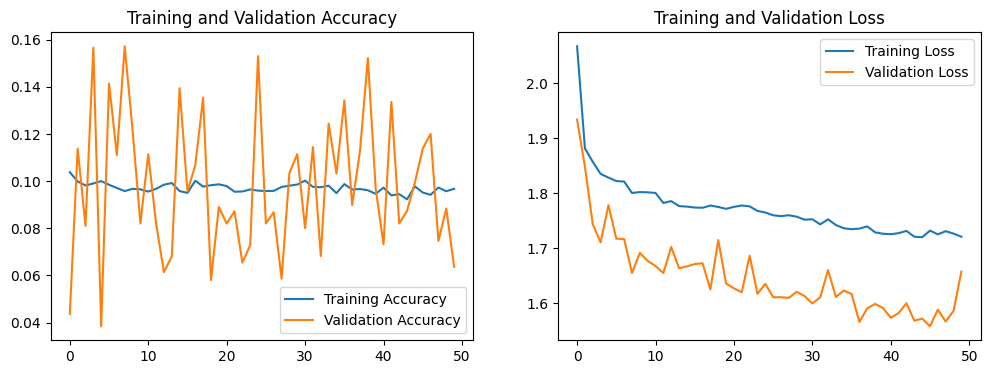

In [ ]:
# Plot the training and validation accuracy and loss
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

### Our model is suffering from underfitting. Here's why:

* Low training accuracy: The training accuracy hovers around 9-10%, which is very low, even after 50 epochs. This indicates that the model is not learning the patterns in the training data effectively. In a well-trained model, we would expect training accuracy to significantly improve over time.

* Validation accuracy remains low: The validation accuracy stays in the 6-12% range, which is very close to the random guess baseline for CIFAR-10 (10%, as there are 10 classes). This shows that the model is not generalizing well to the validation data.

* Loss not improving significantly: The training and validation losses are fluctuating but not consistently decreasing. Instead, they remain high, and the validation loss does not show a significant downward trend over the epochs.

* Underfitting Causes

Underfitting occurs when the model is too simple to capture the underlying patterns of the data. In this case, since we're using only dense layers for a complex dataset like CIFAR-10 (which consists of 32x32 color images), the model architecture may be too limited to learn the important features of the data effectively. Convolutional layers are typically more suited for image data, but since we are restricted to dense layers, the capacity of the model is constrained.